# **Evaluation of the Deepfake Project**
---
by Minh Truong
<br>
<br>
## **Introduction**
---

This report aims to summarize and evaluate the data given by the website on which the study was conducted on.
<br>
The objectives of this project was to:
- investigate the error rate of deepfake detection by human perception
- examine whether the age or gender has an influence on the error rate
- and how well the human performs to the deepfake detection A.I "Deepware"

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Data Initialization
userdata_link = "https://raw.githubusercontent.com/xMinhx/My-Public-Cloud/main/userdata.csv"
classification_link = "https://raw.githubusercontent.com/xMinhx/My-Public-Cloud/main/classification.csv"

userdata = pd.read_csv(userdata_link)
classification = pd.read_csv(classification_link)

userdata = userdata.drop(columns=["session_id"])
classification = classification.drop(columns=["id","text","video_id_id", "video_link_id"])

userdata = userdata.rename(columns={"id":"UserID", "testgroup_id":"GroupID", "age":"Age", "pixel_width":"Width", 
                           "pixel_height":"Height","fps":"Fps","gender_id":"Gender","device":"Device"})

classification = classification.rename(columns={"duration_in_sec":"Duration(sec)", "class_field_id":"Category",
                                                "difficulty_id":"Difficulty", "session_id_id":"UserID","play_pause":"Play/Pause","replay":"Replay",
                                                "fullscreen":"Fullscreen", "playback":"Playback","video_id":"Video","label_id":"Label"})

men = userdata.loc[userdata.Gender == 1]
women = userdata.loc[userdata.Gender == 2]
other = userdata.loc[userdata.Gender == 3]

# **Data description**
---
At the initialization of a user profile, the user will be assigned to one of two groups randomly. Group "1" and group "2". Group "1" receives feedback, whether their submission was correct, whereas group "2" receives no feedback at all. The data was collected using Javascript and SQL and can be separated into two major categories. 
- **User data:**
  - age
  - screen resolution
  - frames per second
  - gender
  - which test group they belong to

- **Classification**
  - frequency counts:
    - play, pause
    - replay
    - fullscreen
    - playback
  - duration watched
  - submitted text
  - category submission (manipulated or not-manipulated)
  - difficulty (how hard was it to classify the video?)
  - the video they evaluated

A short preview of the collected data can be seen below:

### **Example Data (Userdata)**

In [2]:
userdata.head()

,UserID,Age,Width,Height,Fps,Gender,GroupID,Device
0,1,18,1920,975,145,2,2,mobile
1,2,22,1920,975,145,1,2,mobile
2,3,22,1920,975,145,1,1,desktop
3,4,12,1879,1008,144,1,2,desktop
4,5,19,1920,959,108,1,2,tablet


### **Example Data (Classification)**

In [3]:
classification.head()

,Play/Pause,Replay,Fullscreen,Playback,Duration(sec),Category,Difficulty,UserID,Video,Label
0,0,0,0,0,7,2,2,1,axwovszumc.mp4,2
1,0,0,0,0,6,2,2,1,dhxctgyoqj.mp4,1
2,0,0,0,0,5,2,2,1,bgwmmujlmc.mp4,1
3,0,0,0,0,5,2,2,1,bntlodcfeg.mp4,2
4,0,0,0,0,6,2,2,1,bwhlgysghg.mp4,1


# **Evaluation: User participation and statistics**
---


### **User statistics and properties**

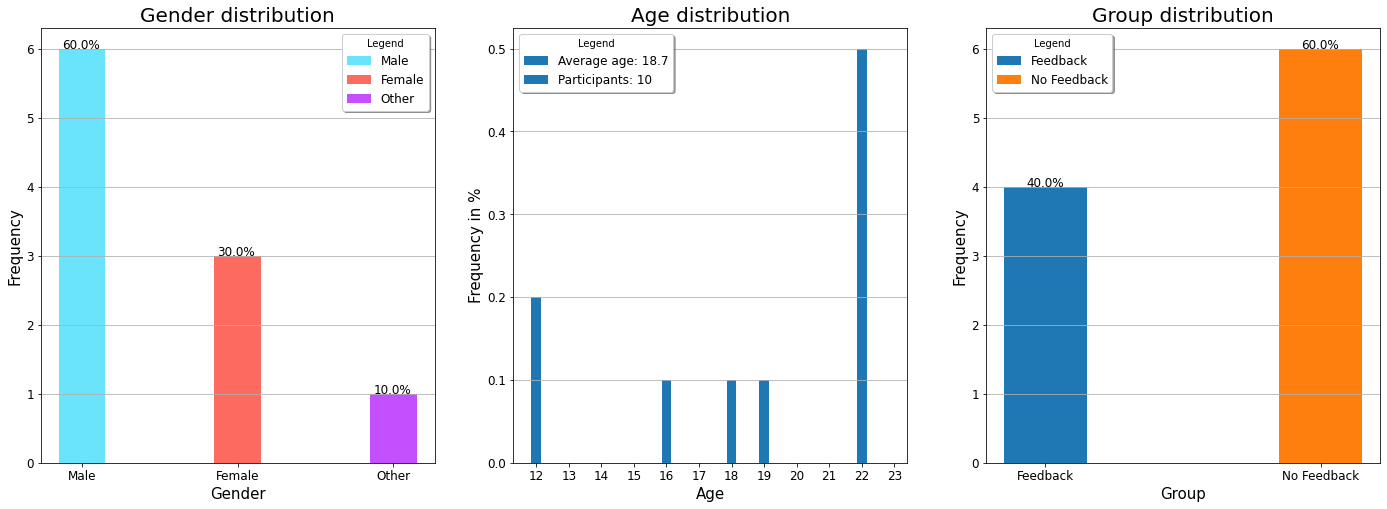

In [21]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(24)

#Plot for gender distribution
axs[0].bar(1,men.Gender.count(), width = 0.3, label = "Male", color="#6ae4fc")
axs[0].bar(2,women.Gender.count(), width = 0.3, label = "Female", color="#fc6a60")
axs[0].bar(3,other.Gender.count(), width = 0.3, label = "Other", color="#c44fff")
axs[0].set_xticks([1, 2, 3])
axs[0].set_xticklabels(["Male", "Female", "Other"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.87, len(men.Gender), str(len(men)/len(userdata)*100) + "%", fontsize=12)
axs[0].text(1.87, len(women.Gender), str(len(women)/len(userdata)*100) + "%", fontsize=12)
axs[0].text(2.87, len(other.Gender), str(len(other)/len(userdata)*100) + "%", fontsize=12)
axs[0].set_title("Gender distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Gender", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Plot for age distribution
axs[1].hist(userdata.Age, width = 0.3, bins = np.arange(np.amin(userdata.Age), np.amax(userdata.Age)+2) , density = "True", label = "Participants")
axs[1].set_xticks(np.arange(np.amin(userdata.Age)+0.15, np.amax(userdata.Age)+2+0.15))
axs[1].set_xticklabels(np.arange(np.amin(userdata.Age), np.amax(userdata.Age)+2), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Age distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True, labels = ["Average age: " + str(sum(userdata.Age)/userdata.Age.count()), "Participants: " + str(userdata.UserID.count())])


#Plot for group distribution
group_1 = userdata.loc[userdata.GroupID == 1].UserID.count()
group_2 = userdata.loc[userdata.GroupID == 2].UserID.count()
axs[2].bar(1, group_1, width = 0.3, label = "Feedback")
axs[2].bar(2, group_2, width = 0.3, label = "No Feedback")
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["Feedback", "No Feedback"], fontsize=12)
axs[2].tick_params(axis="y", labelsize=12)
axs[2].grid(axis="y")
axs[2].text(0.93, group_1, str(group_1/(group_1+group_2)*100) + "%", fontsize=12)
axs[2].text(1.93, group_2, str(group_2/(group_2+group_1)*100) + "%", fontsize=12)
axs[2].set_title("Group distribution", fontsize = 20)
axs[2].set_ylabel("Frequency", fontsize = 15)
axs[2].set_xlabel("Group", fontsize = 15)
_ = axs[2].legend(prop={'size': 12}, title = "Legend", shadow = True)

### **User device properties**

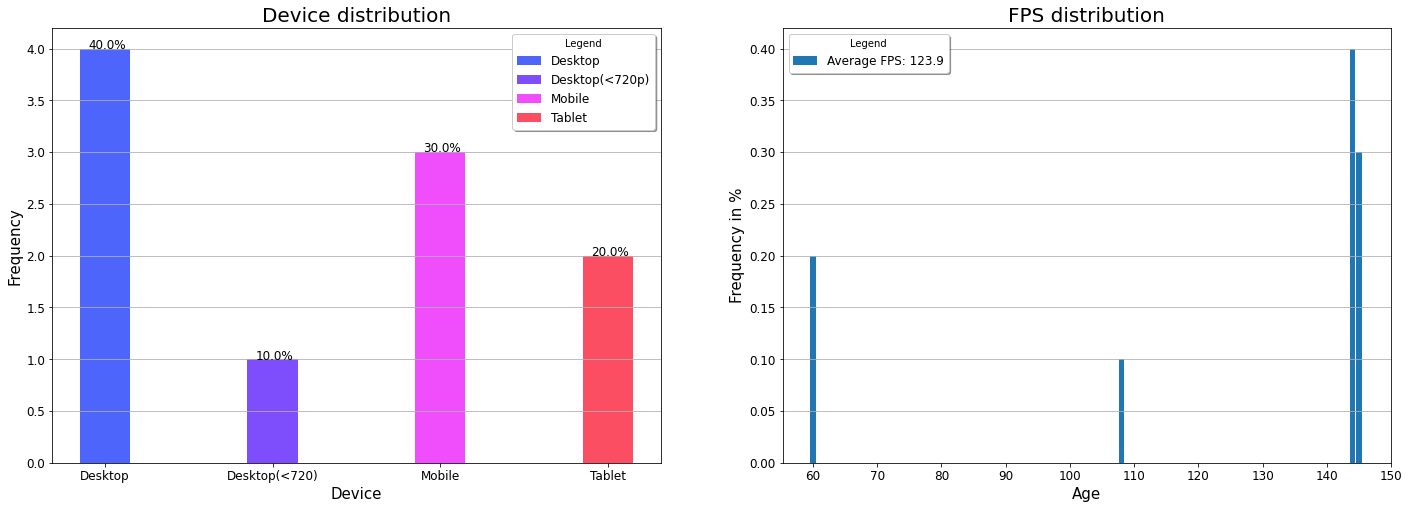

In [17]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(24)

#Data for device distribution
desktop = userdata.loc[(userdata.Device == "desktop") & (userdata.Width >= 720)].UserID.count()
desktop2 = userdata.loc[(userdata.Device == "desktop") & (userdata.Width < 720)].UserID.count()
tablet = userdata.loc[userdata.Device == "tablet"].UserID.count()
mobile = userdata.loc[userdata.Device == "mobile"].UserID.count()
all = desktop + desktop2 + tablet + mobile

#Plot for device distribution
axs[0].bar(1, desktop, width = 0.3, label = "Desktop", color="#4e65fc")
axs[0].bar(2, desktop2, width = 0.3, label = "Desktop(<720p)", color="#7f4efc")
axs[0].bar(3, mobile, width = 0.3, label = "Mobile", color="#f04efc")
axs[0].bar(4, tablet, width = 0.3, label = "Tablet", color="#fc4e62")
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(["Desktop", "Desktop(<720)", "Mobile", "Tablet"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.9, desktop, str(desktop/all*100) + "%", fontsize=12)
axs[0].text(1.9, desktop2, str(desktop2/all*100) + "%", fontsize=12)
axs[0].text(2.9, mobile, str(mobile/all*100) + "%", fontsize=12)
axs[0].text(3.9, tablet, str(tablet/all*100) + "%", fontsize=12)
axs[0].set_title("Device distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Device", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Plot for fps distribution
axs[1].hist(userdata.Fps, rwidth = 0.85, bins = np.arange(np.amin(userdata.Fps), np.amax(userdata.Fps)+2) , density = "True", label = "Average FPS: " + str(sum(userdata.Fps)/userdata.Fps.count()))
axs[1].set_xticks(np.arange(np.amin(userdata.Fps)+0.5, np.amax(userdata.Fps)+10+0.5, 10))
axs[1].set_xticklabels(np.arange(np.amin(userdata.Fps), np.amax(userdata.Fps)+10, 10), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("FPS distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True)


### **Cleaned: User statistics and properties**

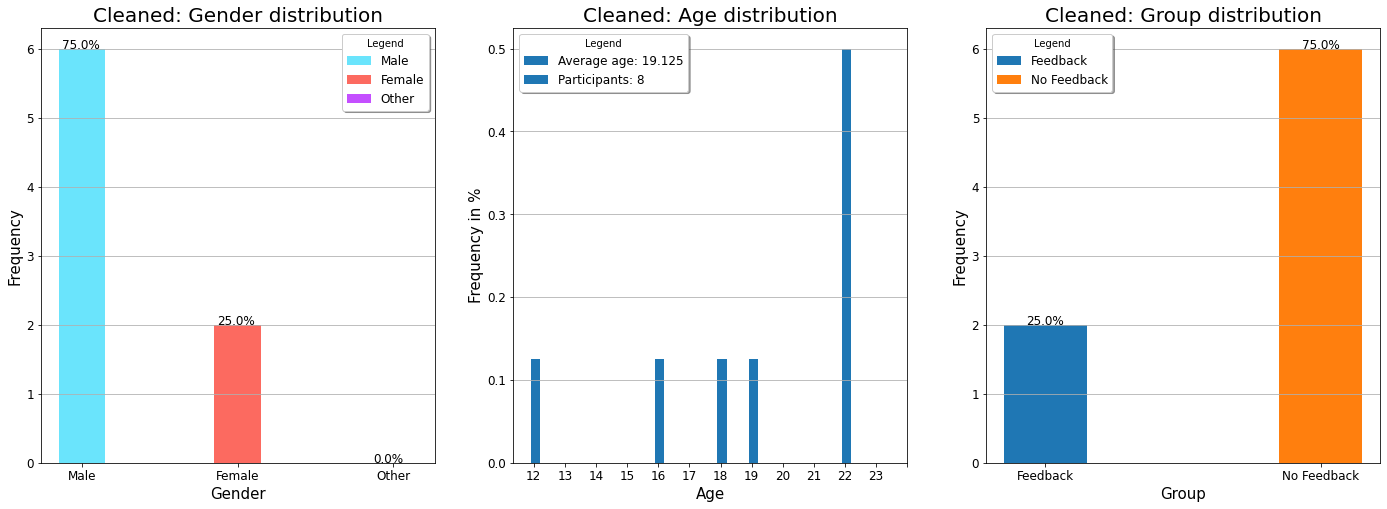

In [13]:
fig, axs = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(24)

#Clean data, only Users who classified atleast 1 Video
userdata_cleaned = userdata.loc[userdata.UserID.isin(classification.UserID)]
men_cleaned = userdata_cleaned.loc[userdata.Gender == 1]
women_cleaned = userdata_cleaned.loc[userdata.Gender == 2]
other_cleaned = userdata_cleaned.loc[userdata.Gender == 3]

#Plot for gender distribution
axs[0].bar(1,men_cleaned.Gender.count(), width = 0.3, label = "Male", color="#6ae4fc")
axs[0].bar(2,women_cleaned.Gender.count(), width = 0.3, label = "Female", color="#fc6a60")
axs[0].bar(3,other_cleaned.Gender.count(), width = 0.3, label = "Other", color="#c44fff")
axs[0].set_xticks([1, 2, 3])
axs[0].set_xticklabels(["Male", "Female", "Other"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.87, len(men_cleaned.Gender), str(len(men_cleaned)/len(userdata_cleaned)*100) + "%", fontsize=12)
axs[0].text(1.87, len(women_cleaned.Gender), str(len(women_cleaned)/len(userdata_cleaned)*100) + "%", fontsize=12)
axs[0].text(2.87, len(other_cleaned.Gender), str(len(other_cleaned)/len(userdata_cleaned)*100) + "%", fontsize=12)
axs[0].set_title("Cleaned: Gender distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Gender", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Plot for age distribution
axs[1].hist(userdata_cleaned.Age, width = 0.3, bins = np.arange(np.amin(userdata_cleaned.Age), np.amax(userdata_cleaned.Age)+2) , density = "True", label = "Participants")
axs[1].set_xticks(np.arange(np.amin(userdata_cleaned.Age)+0.1, np.amax(userdata_cleaned.Age)+2+0.1))
axs[1].set_xticklabels(np.arange(np.amin(userdata_cleaned.Age), np.amax(userdata_cleaned.Age)+2), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Cleaned: Age distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True, labels = ["Average age: " + str(sum(userdata_cleaned.Age)/userdata_cleaned.Age.count()), "Participants: " + str(userdata_cleaned.UserID.count())])


#Plot for group distribution
group_1_cleaned = userdata_cleaned.loc[userdata_cleaned.GroupID == 1].UserID.count()
group_2_cleaned = userdata_cleaned.loc[userdata_cleaned.GroupID == 2].UserID.count()
axs[2].bar(1, group_1_cleaned, width = 0.3, label = "Feedback")
axs[2].bar(2, group_2_cleaned, width = 0.3, label = "No Feedback")
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(["Feedback", "No Feedback"], fontsize=12)
axs[2].tick_params(axis="y", labelsize=12)
axs[2].grid(axis="y")
axs[2].text(0.93, group_1_cleaned, str(group_1_cleaned/(userdata_cleaned.UserID.count())*100) + "%", fontsize=12)
axs[2].text(1.93, group_2_cleaned, str(group_2_cleaned/(userdata_cleaned.UserID.count())*100) + "%", fontsize=12)
axs[2].set_title("Cleaned: Group distribution", fontsize = 20)
axs[2].set_ylabel("Frequency", fontsize = 15)
axs[2].set_xlabel("Group", fontsize = 15)
_ = axs[2].legend(prop={'size': 12}, title = "Legend", shadow = True)

### **Cleaned: User device properties**

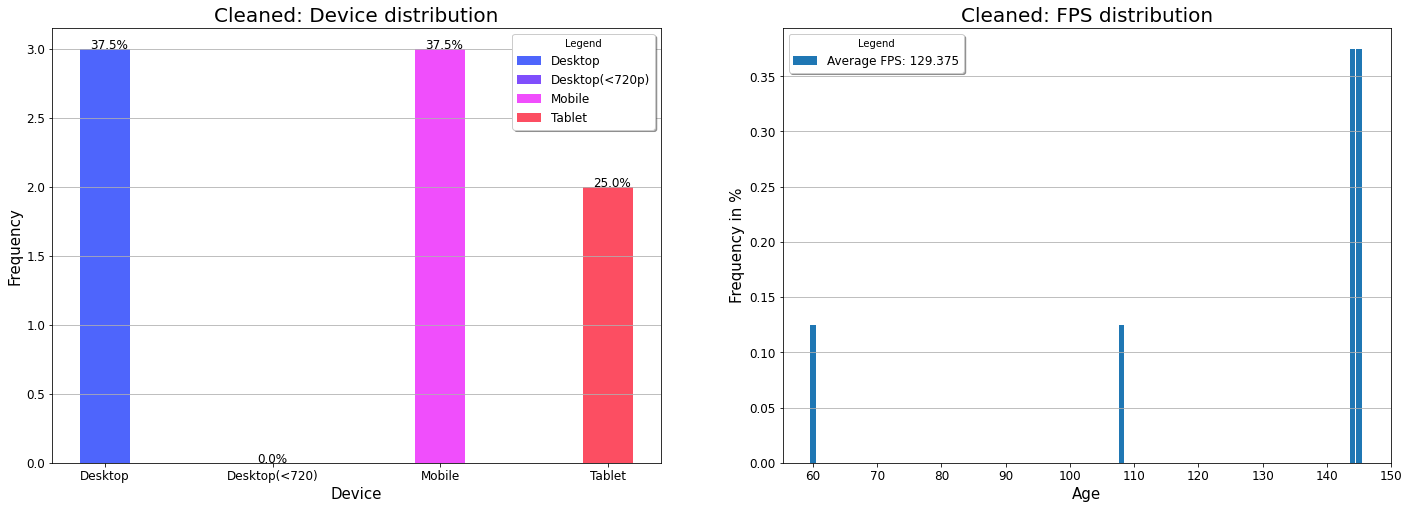

In [28]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(24)

#Data for device distribution
desktop_cleaned = userdata_cleaned.loc[(userdata_cleaned.Device == "desktop") & (userdata_cleaned.Width >= 720)].UserID.count()
desktop2_cleaned = userdata_cleaned.loc[(userdata_cleaned.Device == "desktop") & (userdata_cleaned.Width < 720)].UserID.count()
tablet_cleaned = userdata_cleaned.loc[userdata_cleaned.Device == "tablet"].UserID.count()
mobile_cleaned = userdata_cleaned.loc[userdata_cleaned.Device == "mobile"].UserID.count()
all_cleaned = desktop_cleaned + desktop2_cleaned + tablet_cleaned + mobile_cleaned

#Plot for device distribution
axs[0].bar(1, desktop_cleaned, width = 0.3, label = "Desktop", color="#4e65fc")
axs[0].bar(2, desktop2_cleaned, width = 0.3, label = "Desktop(<720p)", color="#7f4efc")
axs[0].bar(3, mobile_cleaned, width = 0.3, label = "Mobile", color="#f04efc")
axs[0].bar(4, tablet_cleaned, width = 0.3, label = "Tablet", color="#fc4e62")
axs[0].set_xticks([1, 2, 3, 4])
axs[0].set_xticklabels(["Desktop", "Desktop(<720)", "Mobile", "Tablet"], fontsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(axis="y")
axs[0].text(0.91, desktop_cleaned, str(desktop_cleaned/all_cleaned*100) + "%", fontsize=12)
axs[0].text(1.91, desktop2_cleaned, str(desktop2_cleaned/all_cleaned*100) + "%", fontsize=12)
axs[0].text(2.91, mobile_cleaned, str(mobile_cleaned/all_cleaned*100) + "%", fontsize=12)
axs[0].text(3.91, tablet_cleaned, str(tablet_cleaned/all_cleaned*100) + "%", fontsize=12)
axs[0].set_title("Cleaned: Device distribution", fontsize = 20)
axs[0].set_ylabel("Frequency", fontsize = 15)
axs[0].set_xlabel("Device", fontsize = 15)
_ = axs[0].legend(prop={'size': 12}, title = "Legend", shadow = True)

#Plot for fps distribution
axs[1].hist(userdata_cleaned.Fps, rwidth = 0.85, bins = np.arange(np.amin(userdata_cleaned.Fps), np.amax(userdata_cleaned.Fps)+2) , density = "True", label = "Average FPS: " + str(sum(userdata_cleaned.Fps)/userdata_cleaned.Fps.count()))
axs[1].set_xticks(np.arange(np.amin(userdata_cleaned.Fps)+0.5, np.amax(userdata_cleaned.Fps)+10+0.5, 10))
axs[1].set_xticklabels(np.arange(np.amin(userdata_cleaned.Fps), np.amax(userdata_cleaned.Fps)+10, 10), fontsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(axis="y")
axs[1].set_title("Cleaned: FPS distribution", fontsize = 20)
axs[1].set_ylabel("Frequency in %", fontsize = 15)
axs[1].set_xlabel("Age", fontsize = 15)
_ = axs[1].legend(prop={'size': 12}, title = "Legend", shadow = True)

# **Error rate probability**
---

### **Error rate calculation**

In [83]:
list_all = []
men_list = []
women_list = []
other_list = []

for x in userdata_cleaned.UserID:
  classified_videos = classification.loc[classification.UserID == x]
  correct_classified = sum(np.where(classified_videos.Label == classified_videos.Category, True, False))
  correct_rate = (correct_classified/classified_videos.Video.count())
  list_all.append(correct_rate)
  if x in men_cleaned.UserID.unique():
    men_list.append(correct_rate)
  elif x in women_cleaned.UserID.unique():
    women_list.append(correct_rate)
  else:
    other_list.append(correct_rate)

### **Error rate graphs**

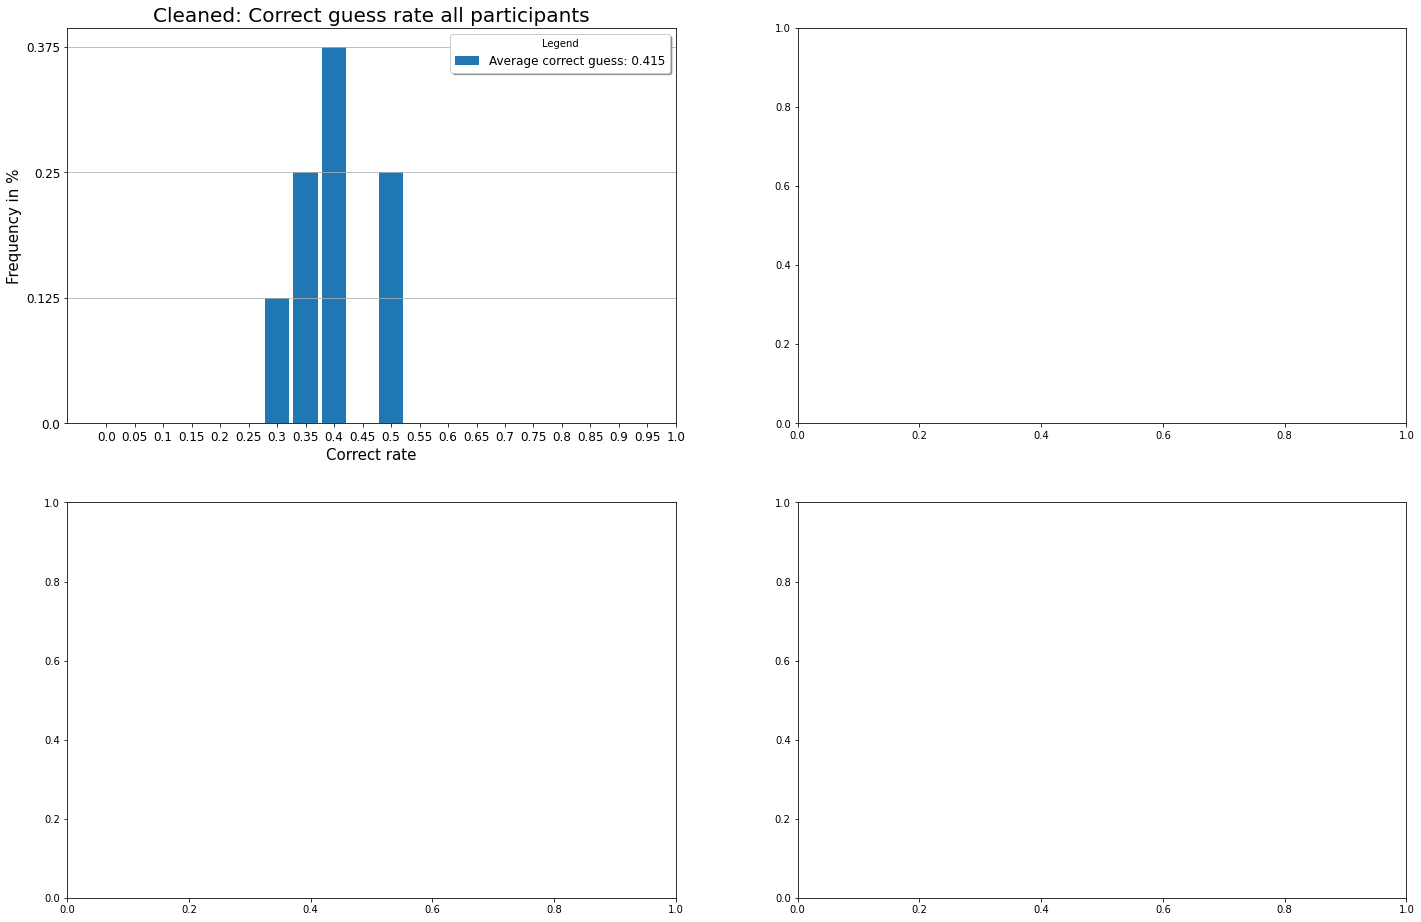

In [121]:
#Plot error rate
fig, axs = plt.subplots(2,2)
fig.set_figheight(16)
fig.set_figwidth(24)

#get highest count
set_num = set(list_all)
highest_frequency = float(0)
for x in set_num:
  tmp_count = list_all.count(float(x))
  if highest_count > highest_frequency:
    highest_frequency = tmp_count

#Calculate yticks and ylabels
yticks = np.arange(0, np.amax(n)+1)
ylabel = [x / len(list_all) for x in yticks]

n, bins, patches = axs[0,0].hist(list_all, rwidth = 0.85, bins = np.arange(0,1,0.05), label = "Average correct guess: " + str(sum(list_all)/len(list_all)))
axs[0,0].set_xticks(np.arange(0+0.025, 1.05+0.025, 0.05))
axs[0,0].set_xticklabels(np.around(np.arange(0, 1.05, 0.05),2), fontsize=12)
axs[0,0].set_yticks(yticks)
axs[0,0].set_yticklabels(ylabel)
axs[0,0].tick_params(axis="y", labelsize=12)
axs[0,0].grid(axis="y")
axs[0,0].set_title("Cleaned: Correct guess rate all participants", fontsize = 20)
axs[0,0].set_ylabel("Frequency in %", fontsize = 15)
axs[0,0].set_xlabel("Correct rate", fontsize = 15)
_ = axs[0,0].legend(prop={'size': 12}, title = "Legend", shadow = True)